#### Calculate the magnetic field of a permanent magnet

https://www.magnet-sdm.com/2017/08/01/magnetic-field-strength-permanent-magnet/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

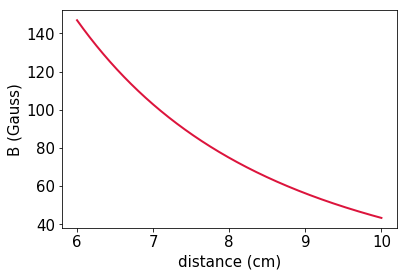

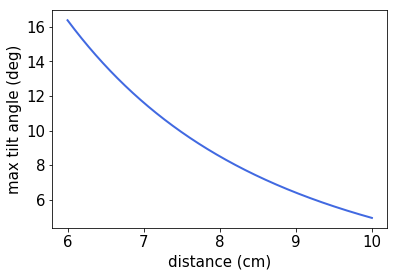

In [3]:
# Magnet for fine alignment
Br = 14200 # residual induction (G)
D = 30 #magnet diameter (mm)
L0 = 50 #magnet thickness (mm)
# magnet from Stuttgart's paper

R = 0.5*D*1e-3
L = L0*1e-3
x = np.linspace (0.06,0.10, 1000) #distance from magnet (m)
B = 0.5*Br*(((L+x)/((R**2+(L+x)**2)**0.5))-(x/((x**2+R**2)**0.5)))

plt.plot (x*100, B, color = 'crimson', linewidth = 2)
plt.xlabel ('distance (cm)', fontsize = 15)
plt.ylabel ('B (Gauss)', fontsize = 15)
plt.show()

B0 = 500 #static magnetic field (G)
angle = (180/np.pi)*np.arctan (B/B0)
plt.plot (x*100, angle, color = 'royalblue', linewidth = 2)
plt.xlabel ('distance (cm)', fontsize = 15)
plt.ylabel ('max tilt angle (deg)', fontsize = 15)
plt.show()


##### Tuning resolution
If we can move the magnet by 1 micron, what is the resolution is magnetic field tuning?


In [10]:
# Magnet outside the cryo for fine alignment
Br = 14200 # residual induction (G)
D = 30 #magnet diameter (mm)
L0 = 50 #magnet thickness (mm)
# magnet from Stuttgart's paper

R = 0.5*D*1e-3
L = L0*1e-3
x = 0.10 #magnet-sample distance (m)
dx = 1e-6 #magnet stage step (m)
B0 = 0.5*Br*(((L+x)/((R**2+(L+x)**2)**0.5))-(x/((x**2+R**2)**0.5)))
B1 = 0.5*Br*(((L+x+dx)/((R**2+(L+x+dx)**2)**0.5))-((x+dx)/(((x+dx)**2+R**2)**0.5)))
dB_tesla = abs(B1-B0)*1e-4

B_strong = 400 #fixed permanent magnet field (G)

print ("Fraction of tuning field (dB/B): ", abs(B1-B0)/B0)
print ("Fraction of strong field (dB/B0): ", abs(B1-B0)/B_strong)
print ("Shift: ", 1e9*dB_tesla, "nT")
print ("ESR shift: ", 28e6*dB_tesla, " kHz")

Fraction of tuning field (dB/B):  2.4903596589274667e-05
Fraction of strong field (dB/B0):  2.6968070582533697e-06
Shift:  107.87228233013481 nT
ESR shift:  3.0204239052437742  kHz


If the magnet is on a stage that vibrates by 200nm, what's the field instability?

In [12]:
# Magnet inside the cryo for fine alignment
Br = 14200 # residual induction (G)
D = 10 #magnet diameter (mm)
L0 = 0.7 #magnet thickness (mm)

R = 0.5*D*1e-3
L = L0*1e-3
x = 0.01 #magnet-sample distance (m)
dx = 100e-9 #magnet stage vibration (m)
B0 = 0.5*Br*(((L+x)/((R**2+(L+x)**2)**0.5))-(x/((x**2+R**2)**0.5)))
B1 = 0.5*Br*(((L+x+dx)/((R**2+(L+x+dx)**2)**0.5))-((x+dx)/(((x+dx)**2+R**2)**0.5)))
dB_tesla = abs(B1-B0)*1e-4

B_strong = 400 #fixed permanent magnet field (G)

print ("Fraction of tuning field (dB/B): ", abs(B1-B0)/B0)
print ("Fraction of strong field (dB/B0): ", abs(B1-B0)/B_strong)
print ("Shift: ", 1e9*dB_tesla, "nT")
print ("ESR shift: ", 28e6*dB_tesla, " kHz")

Fraction of tuning field (dB/B):  2.351587392600709e-05
Fraction of strong field (dB/B0):  4.816674003969012e-06
Shift:  192.66696015876053 nT
ESR shift:  5.394674884445295  kHz
